In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error  # MSE and RMSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score # r-squared

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import neighbors

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\COURSE_9_NIIT\\c9_s7_project1\\DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv",sep=";")

In [3]:
df.head(2)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0


In [4]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

# KNN

In [5]:
df['High Absenteeism'] = (df['Absenteeism time in hours'] > 10).astype(int)

In [6]:
x= df.drop(['Absenteeism time in hours', 'High Absenteeism'], axis=1)

In [7]:
y = df['High Absenteeism']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [11]:
x_test = scaler.transform(x_test)

In [12]:
performance = []
k_options = np.arange(2,100)

for which_k in k_options:
    temp_model = neighbors.KNeighborsClassifier(which_k)
    temp_model.fit(x_train,y_train)
    y_pred = temp_model.predict(x_test)
    print(f"if k is {which_k} then Performance is",accuracy_score(y_test, y_pred) * 100)
    performance.append(accuracy_score(y_test, y_pred)*100)

if k is 2 then Performance is 91.8918918918919
if k is 3 then Performance is 91.21621621621621
if k is 4 then Performance is 91.8918918918919
if k is 5 then Performance is 91.8918918918919
if k is 6 then Performance is 92.56756756756756
if k is 7 then Performance is 92.56756756756756
if k is 8 then Performance is 92.56756756756756
if k is 9 then Performance is 92.56756756756756
if k is 10 then Performance is 92.56756756756756
if k is 11 then Performance is 92.56756756756756
if k is 12 then Performance is 92.56756756756756
if k is 13 then Performance is 92.56756756756756
if k is 14 then Performance is 92.56756756756756
if k is 15 then Performance is 92.56756756756756
if k is 16 then Performance is 92.56756756756756
if k is 17 then Performance is 92.56756756756756
if k is 18 then Performance is 92.56756756756756
if k is 19 then Performance is 92.56756756756756
if k is 20 then Performance is 92.56756756756756
if k is 21 then Performance is 92.56756756756756
if k is 22 then Performance is 

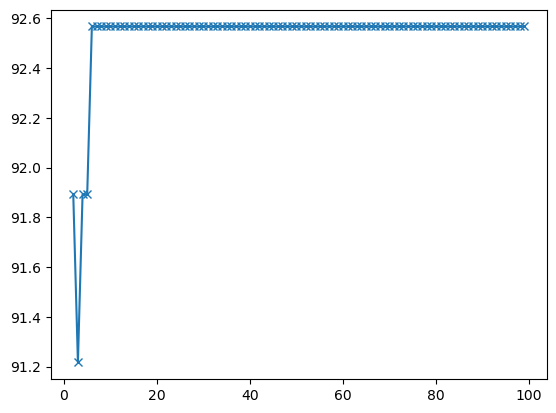

In [13]:
import matplotlib.pyplot as plt
plt.plot(k_options, performance, marker = "x")
plt.show()

In [14]:
final_model = neighbors.KNeighborsClassifier(4)
final_model.fit(x_train,y_train)
#.score
y_pred = final_model.predict(x_test)
print(f"if k is 26 then Performance is",accuracy_score(y_test, y_pred) * 100)

if k is 26 then Performance is 91.8918918918919


In [15]:
final_model.classes_

array([0, 1])

In [16]:
from sklearn.metrics import f1_score
print(f1_score( y_test, y_pred, average = "weighted"))

0.8865626189569853


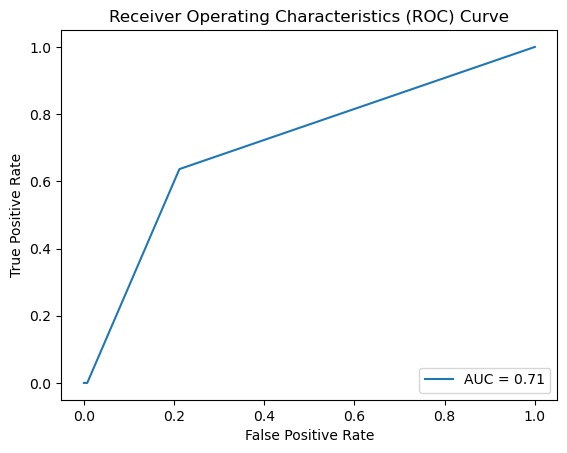

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

y_prob = final_model.predict_proba(x_test)[ : , 1]


fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#Plot ROC curve
roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
roc_display.plot()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics (ROC) Curve")
plt.legend(loc = "lower right")
plt.show()

# KMeans

In [19]:
features = ['Reason for absence', 'Age', 'Distance from Residence to Work', 'Service time', 'Body mass index']

In [20]:
x=df[features]

In [21]:
x_scaled = scaler.fit_transform(x)

In [23]:
from sklearn.cluster import KMeans

In [25]:
err = []
mycluster = np.arange(2,11)
for i in mycluster:
  model = KMeans(n_clusters = i)
  model.fit(x)
  err.append(model.inertia_)

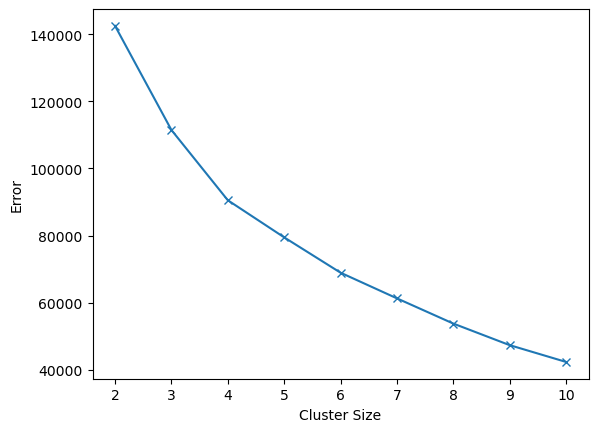

In [26]:
plt.plot(mycluster, err, marker = "x")
plt.xlabel("Cluster Size")
plt.ylabel("Error")
plt.show()

In [27]:
km_x=x.iloc[:,:].values
model_1=KMeans(n_clusters=4)
y_m=model_1.fit_predict(km_x)

In [28]:
km_x

array([[26, 33, 36, 13, 30],
       [ 0, 50, 13, 18, 31],
       [23, 38, 51, 18, 31],
       ...,
       [ 0, 40, 14, 13, 34],
       [ 0, 39, 35, 14, 35],
       [ 0, 53, 45, 14, 25]], dtype=int64)

In [29]:
my_color=["pink","green","red","yellow"]

In [30]:
model_1.cluster_centers_

array([[23.92307692, 40.48901099, 16.1043956 , 13.67032967, 27.93956044],
       [21.1182266 , 36.33990148, 50.71428571, 14.07881773, 28.10837438],
       [21.58767773, 31.36018957, 28.92417062, 10.02369668, 24.1563981 ],
       [ 7.11111111, 38.95833333, 18.04166667, 12.70138889, 26.75694444]])

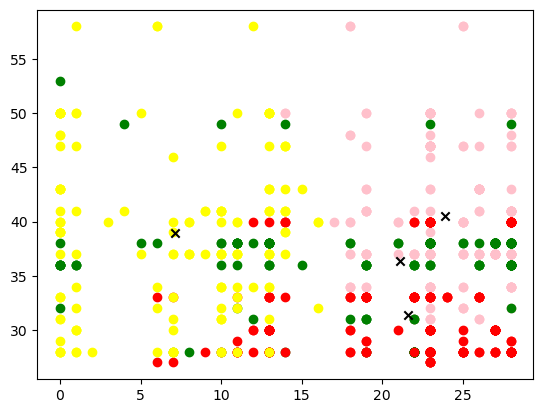

In [32]:
for i in range(4):
  plt.scatter(km_x[y_m==i,0],km_x[y_m==i,1],color=my_color[i])
  plt.scatter( model_1.cluster_centers_[i,0], model_1.cluster_centers_[i,1], c="black",marker = 'x')
plt.show()